In [5]:
from __future__ import print_function
import psutil
print(psutil.cpu_percent())
print(psutil.virtual_memory()) 

0.0
svmem(total=18940473344, available=12463464448, percent=34.2, used=6111322112, free=11709419520, active=6724743168, inactive=203522048, buffers=183173120, cached=936558592, shared=25767936)


In [6]:
import numpy
import pandas as pd 

In [7]:
from datetime import datetime
parser = lambda date: pd.datetime.strptime(date, '%d%b%Y-%H:%M:%S')

In [8]:
df1=pd.read_csv("/data/SWaT_Dataset/Network/addin1", header=None)

In [9]:
df3 = df1[0].value_counts()

In [10]:
df3 = pd.DataFrame(df3)

In [11]:
df3['ts'] = df3.index


In [12]:
df3['ts'] = df3['ts'].apply(parser)

In [13]:
df3 = df3.sort_values(by='ts')

df3.plot()

df3.columns = ["count", "timestamp"]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


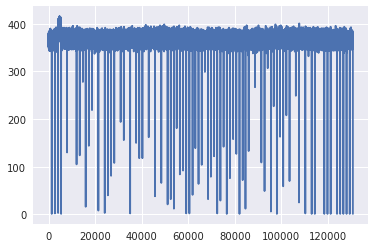

In [18]:
import matplotlib.pyplot as plt

plt.plot(df3["count"])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


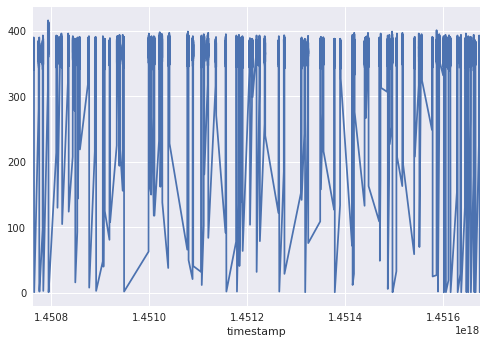

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#plt.plot(df3['ts'],df3[0])
df3.reset_index(drop=True, inplace=True)
sns.tsplot(df3["count"], time=df3['timestamp'])

### Missing timestamps from logs 

In [ ]:
df3['timestamp'] = df3['timestamp'].astype('datetime64[ns]')

In [ ]:
dfx = df3.resample('1S', on='timestamp', base=8).mean()

In [ ]:
dfx =  pd.DataFrame(dfx)

In [ ]:
dfx.loc[dfx['count'].isnull()] = 0 

#### There are no log events for 780572 seconds out of 900K 

In [ ]:
dfx.loc[dfx['count'] == 0]

In [ ]:
dfx['timestamp']  = dfx.index

In [ ]:
dfx = dfx.reset_index(drop=True)

In [ ]:
pd.DataFrame(dfx).dtypes

In [ ]:
#from bokeh.charts import TimeSeries, output_file, show
#%matplotlib inline
#output_file("timeseries.html")
#data = dict(val=dfx['count'], time=dfx['timestamp'])
#p = TimeSeries(data, title="log activity", ylabel='number of events')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#plt.plot(df3['ts'],df3[0])

sns.tsplot(dfx['count'])

In [ ]:
import pandas as pd
from bokeh.charts import TimeSeries, output_file, show

data = dict(df3[0], Date=df3['ts'])

p = TimeSeries(data, index=df3['ts'], title="", ylabel='')

show(p)

In [ ]:
#df1['dtime'] = df1[0].astype(str) +"-"+ df1[1]
#datetime.strptime("1/Jan/2016 18:52:39","%d/%b/%Y %H:%M:%S")
#from datetime import datetime
#tsread = lambda x: datetime.strptime(x, '%d%b%Y-%H:%M:%S')
#pd.datetime.strptime(df1['dtime'], '%d%b%Y-%H:%M:%S')
#tsdata = df1['dtime'].applymap(tsread)